# Part A

Importing Libraries

In [69]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tag import RegexpTagger
from nltk import CFG
from nltk.parse import ChartParser
from textblob import TextBlob
import spacy

import string

## Q1

In [70]:
#Q1.1

# Reading text file
with open("Data_1.txt", "r", encoding="utf-8") as file:
    text = file.read()

#Regular Expression Tokenization
tokens_regex = re.findall(r'\b\w+\b', text)

#NLTK Tokenization
nltk.download('punkt')
tokens_nltk = word_tokenize(text)

#TextBlob Tokenization
tokens_textblob = TextBlob(text).words

# Load spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Tokenize using spaCy
doc = nlp(text)
tokens_spacy = [token.text for token in doc]

# ✅ Print All Tokenization Results
print("\n✅ TOKENIZATION RESULTS (FULL OUTPUT):\n")
print("🔹 Regular Expression Tokens:\n", tokens_regex, "\n")
print("🔹 NLTK Tokens:\n", tokens_nltk, "\n")
print("🔹 TextBlob Tokens:\n", tokens_textblob, "\n")
print("🔹 spaCy Tokens:\n", tokens_spacy, "\n")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cocon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



✅ TOKENIZATION RESULTS (FULL OUTPUT):

🔹 Regular Expression Tokens:
 ['Classification', 'is', 'the', 'task', 'of', 'choosing', 'the', 'correct', 'class', 'label', 'for', 'a', 'given', 'input', 'In', 'basic', 'classification', 'tasks', 'each', 'input', 'is', 'considered', 'in', 'isolation', 'from', 'all', 'other', 'inputs', 'and', 'the', 'set', 'of', 'labels', 'is', 'defined', 'in', 'advance', 'The', 'basic', 'classification', 'task', 'has', 'a', 'number', 'of', 'interesting', 'variants', 'For', 'example', 'in', 'multiclass', 'classification', 'each', 'instance', 'may', 'be', 'assigned', 'multiple', 'labels', 'in', 'open', 'class', 'classification', 'the', 'set', 'of', 'labels', 'is', 'not', 'defined', 'in', 'advance', 'and', 'in', 'sequence', 'classification', 'a', 'list', 'of', 'inputs', 'are', 'jointly', 'classified'] 

🔹 NLTK Tokens:
 ['Classification', 'is', 'the', 'task', 'of', 'choosing', 'the', 'correct', 'class', 'label', 'for', 'a', 'given', 'input', '.', 'In', 'basic', 'clas

In [71]:
#Q1.3


# Ensure required NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Read the text file into a variable
with open("Data_1.txt", "r", encoding="utf-8") as file:
    text_data = file.read()

# Tokenize the text
tokens = word_tokenize(text_data)

# Load English stop words
stop_words = set(stopwords.words('english'))

# Remove stop words and punctuation
filtered_tokens = [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]

# Identify stop words in the text
found_stop_words = [word for word in tokens if word.lower() in stop_words]

# Display results
print(f"Original Tokens:\n{tokens}\n")
print(f"Filtered Tokens (Stop Words & Punctuation Removed):\n{filtered_tokens}\n")
print(f"Stop Words Found in Corpus:\n{found_stop_words}\n")


Original Tokens:
['Classification', 'is', 'the', 'task', 'of', 'choosing', 'the', 'correct', 'class', 'label', 'for', 'a', 'given', 'input', '.', 'In', 'basic', 'classification', 'tasks', ',', 'each', 'input', 'is', 'considered', 'in', 'isolation', 'from', 'all', 'other', 'inputs', ',', 'and', 'the', 'set', 'of', 'labels', 'is', 'defined', 'in', 'advance', '.', 'The', 'basic', 'classification', 'task', 'has', 'a', 'number', 'of', 'interesting', 'variants', '.', 'For', 'example', ',', 'in', 'multiclass', 'classification', ',', 'each', 'instance', 'may', 'be', 'assigned', 'multiple', 'labels', ';', 'in', 'open-class', 'classification', ',', 'the', 'set', 'of', 'labels', 'is', 'not', 'defined', 'in', 'advance', ';', 'and', 'in', 'sequence', 'classification', ',', 'a', 'list', 'of', 'inputs', 'are', 'jointly', 'classified', '.']

Filtered Tokens (Stop Words & Punctuation Removed):
['Classification', 'task', 'choosing', 'correct', 'class', 'label', 'given', 'input', 'basic', 'classification

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cocon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cocon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Q2

In [72]:
#Q2.2

# Regular Expression
steming_regex = [re.sub(r'(ing|ed|s)$', '', word) for word in tokens_nltk]

#Porter Stemmer
porter = PorterStemmer()
steming_porter = [porter.stem(word) for word in tokens_nltk]

# Lancaster Stemmer
lancaster = LancasterStemmer()
steming_lancaster = [lancaster.stem(word) for word in tokens_nltk]

print("Results:")
print(f"Regex: {steming_regex}")
print(f"Porter: {steming_porter}")
print(f"Lancester: {steming_lancaster}")

Results:
Regex: ['Classification', 'i', 'the', 'task', 'of', 'choos', 'the', 'correct', 'clas', 'label', 'for', 'a', 'given', 'input', '.', 'In', 'basic', 'classification', 'task', ',', 'each', 'input', 'i', 'consider', 'in', 'isolation', 'from', 'all', 'other', 'input', ',', 'and', 'the', 'set', 'of', 'label', 'i', 'defin', 'in', 'advance', '.', 'The', 'basic', 'classification', 'task', 'ha', 'a', 'number', 'of', 'interest', 'variant', '.', 'For', 'example', ',', 'in', 'multiclas', 'classification', ',', 'each', 'instance', 'may', 'be', 'assign', 'multiple', 'label', ';', 'in', 'open-clas', 'classification', ',', 'the', 'set', 'of', 'label', 'i', 'not', 'defin', 'in', 'advance', ';', 'and', 'in', 'sequence', 'classification', ',', 'a', 'list', 'of', 'input', 'are', 'jointly', 'classifi', '.']
Porter: ['classif', 'is', 'the', 'task', 'of', 'choos', 'the', 'correct', 'class', 'label', 'for', 'a', 'given', 'input', '.', 'in', 'basic', 'classif', 'task', ',', 'each', 'input', 'is', 'consi

## Q3

In [73]:
#Q3.1

# Ensure the required NLTK resources are downloaded
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')

# Read the text file
with open("Data_2.txt", "r", encoding="utf-8") as file2:
    text2 = file2.read()

# Tokenize the text
tokens = word_tokenize(text2)

# ✅ 1. NLTK POS Tagger
pos_tags_nltk = nltk.pos_tag(tokens)

# ✅ 2. TextBlob POS Tagger
blob = TextBlob(text2)
pos_tags_blob = blob.tags

# ✅ 3. Regular Expression (Regex) POS Tagger
patterns = [
    (r'.*ing$', 'VBG'),  # Gerund/Present Participle
    (r'.*ed$', 'VBD'),   # Past Tense Verb
    (r'.*es$', 'VBZ'),   # Third Person Singular Verb
    (r'.*s$', 'NNS'),    # Plural Noun
    (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # Numbers
    (r'.*ly$', 'RB'),    # Adverbs
    (r'.*', 'NN')        # Default case -> Noun
]

regex_tagger = RegexpTagger(patterns)
pos_tags_regex = regex_tagger.tag(tokens)

# ✅ Print Results
print("✅ POS Tagging Results:\n")
print("🔹 NLTK POS Tags:\n", pos_tags_nltk, "\n")
print("🔹 TextBlob POS Tags:\n", pos_tags_blob, "\n")
print("🔹 Regex POS Tags:\n", pos_tags_regex, "\n")


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cocon\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cocon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cocon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ POS Tagging Results:

🔹 NLTK POS Tags:
 [('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB'), ('.', '.')] 

🔹 TextBlob POS Tags:
 [('The', 'DT'), ('big', 'JJ'), ('black', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('white', 'JJ'), ('cat', 'NN'), ('and', 'CC'), ('chased', 'VBD'), ('away', 'RB')] 

🔹 Regex POS Tags:
 [('The', 'NN'), ('big', 'NN'), ('black', 'NN'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'NN'), ('the', 'NN'), ('white', 'NN'), ('cat', 'NN'), ('and', 'NN'), ('chased', 'VBD'), ('away', 'NN'), ('.', 'NN')] 



In [ ]:
# Read input sentence from Data_2.txt
with open("Data_2.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Tokenize the sentence (removes punctuation)
tokens = nltk.word_tokenize(text)
tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation

# Define the corrected grammar
grammar = CFG.fromstring("""
S -> NP VP
NP -> DT JJ JJ NN | DT JJ NN | DT NN | NP CC NP
VP -> VBD PP | VBD Adv | VBD NP | VP CC VP
PP -> IN NP
DT -> 'The' | 'the' | 'A' | 'a'
JJ -> 'big' | 'black' | 'white' | 'small' | 'quick'
NN -> 'dog' | 'cat' | 'fox' | 'rabbit'
VBD -> 'barked' | 'chased' | 'jumped' | 'ran'
IN -> 'at' | 'on' | 'over' | 'under'
CC -> 'and' | 'or'
Adv -> 'away' | 'quickly' | 'silently'
""")

# Initialize parser
parser = ChartParser(grammar)

# Generate parse trees
print("Parse Trees:")
for tree in parser.parse(tokens):
    print(tree)
    tree.draw()


Parse Trees:
(S
  (NP (DT The) (JJ big) (JJ black) (NN dog))
  (VP
    (VP (VBD barked) (PP (IN at) (NP (DT the) (JJ white) (NN cat))))
    (CC and)
    (VP (VBD chased) (Adv away))))


# PART B

Importing Libraries

In [17]:
# Install necessary libraries (if not already installed)
# !pip install pandas numpy matplotlib seaborn nltk wordcloud

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from collections import Counter
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK data (run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cocon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cocon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cocon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Q1 Dataset and EDA

### Loading the dataset

In [2]:
# Load dataset with correct encoding
file_path = "McDonald_s_Reviews.csv" 
df = pd.read_csv(file_path, encoding="ISO-8859-1")
print("✅ Dataset Loaded Successfully!")

✅ Dataset Loaded Successfully!


### Shape of the Data

In [3]:
df.shape

(33396, 10)

### Features of Dataset

In [5]:
# Info of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewer_id    33396 non-null  int64  
 1   store_name     33396 non-null  object 
 2   category       33396 non-null  object 
 3   store_address  33396 non-null  object 
 4   latitude       32736 non-null  float64
 5   longitude      32736 non-null  float64
 6   rating_count   33396 non-null  object 
 7   review_time    33396 non-null  object 
 8   review         33396 non-null  object 
 9   rating         33396 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


### Dataset Summary

In [10]:
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


### Check for Null Values

In [11]:
# Check Null Values
df.isnull().sum()

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64

### Check for Duplicates

In [12]:
duplicates = df.duplicated(subset=['review']).sum()
print(f"Number of duplicate reviews: {duplicates}")


Number of duplicate reviews: 11111


### Explore Random Samples for Potential Issues

In [13]:
# Inspect random reviews
for review in df['review'].sample(10, random_state=42):
    print("-", review)


- Somehow they forgot to give us our order...no big deal I needed the exercise and they did apologize
- Neutral
- Drive thru a little slow but friendly people and food on par
- Normal McDonald's not much else to say
- Good service
- I went through the drive-through and ordered a double Mac meal. I received a single Mac meal And the food was cold. I drove away and call back and told  Them  my meal was wrong. The manager tells me on my next visit I will receive a complimentary order. NO how about giving me the right order or given me my money back. I gave this McDonald's the benefit of Benefit of the doubt is not my 1st Bad Experience in this McDonald's. But it will be my last as I will never visit this McDonald's again.
- Stopped in here on January 24th 2018 and ordered at the counter, a signature classic grilled signature sriacha chicken sandwich with an artisan bun. Paid for my order and waited. When my order was ready it was handed to me in a bag.I asked for ketchup and proceeded to 

### Data Visualization

#### Distribution of Ratings

C:\Users\cocon\AppData\Local\Temp\ipykernel_20856\721403705.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="rating", order=rating_order, palette="viridis")


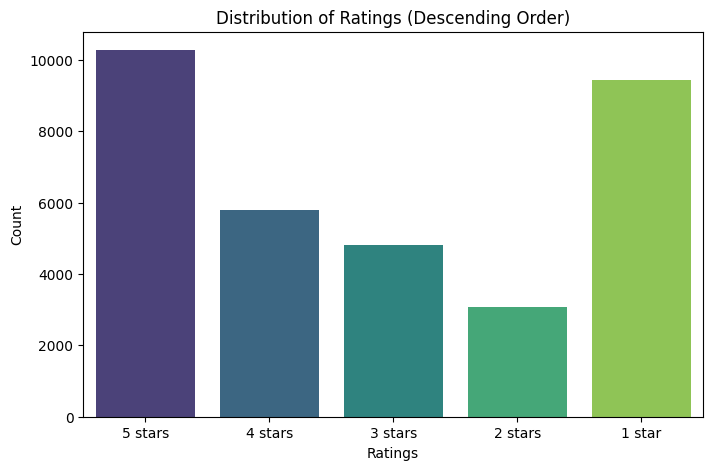

In [14]:
plt.figure(figsize=(8,5))

# Sort ratings in descending order
rating_order = df["rating"].value_counts().sort_index(ascending=False).index

sns.countplot(data=df, x="rating", order=rating_order, palette="viridis")
plt.title("Distribution of Ratings (Descending Order)")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()


#### Top Locations with Most Reviews

C:\Users\cocon\AppData\Local\Temp\ipykernel_20856\720945273.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stores.values, y=top_stores.index, palette="coolwarm")


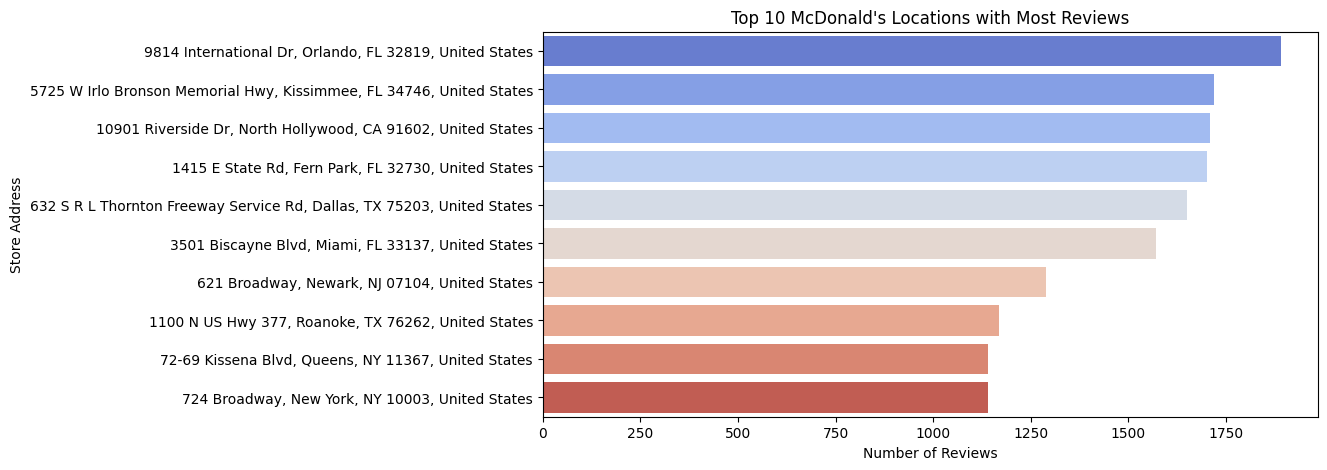

In [15]:
plt.figure(figsize=(10,5))
top_stores = df["store_address"].value_counts().head(10)  # Top 10 locations
sns.barplot(x=top_stores.values, y=top_stores.index, palette="coolwarm")
plt.title("Top 10 McDonald's Locations with Most Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Store Address")
plt.show()


#### Relationship Between Ratings & Review Length

C:\Users\cocon\AppData\Local\Temp\ipykernel_20856\3056853497.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="rating", y="Review_Length", palette="magma", order=rating_order)


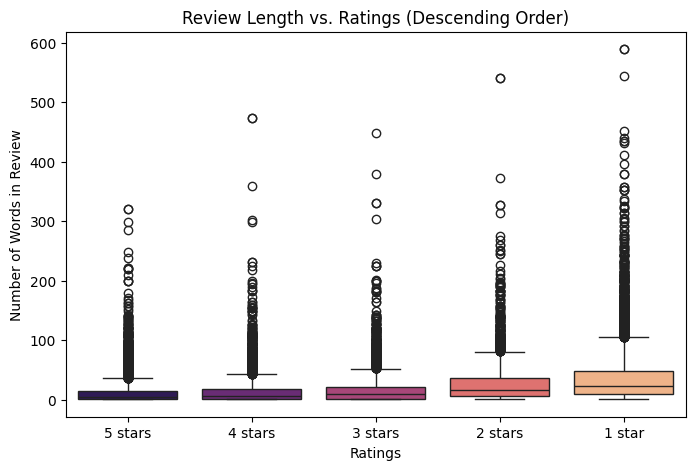

In [16]:
#Relationship Between Ratings & Review Length

df["Review_Length"] = df["review"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="rating", y="Review_Length", palette="magma", order=rating_order)
plt.title("Review Length vs. Ratings (Descending Order)")
plt.xlabel("Ratings")
plt.ylabel("Number of Words in Review")
plt.show()



#### Word Frequency in Reviews

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cocon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\cocon\AppData\Local\Temp\ipykernel_20856\3502252154.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words], palette="rocket")


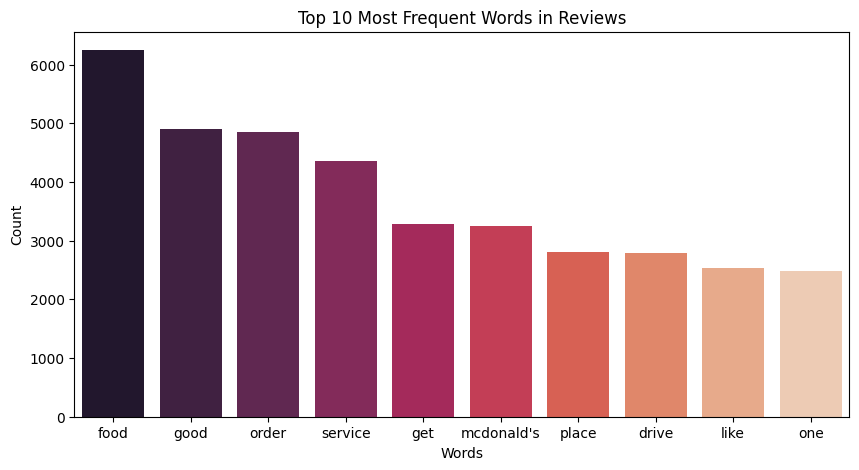

In [17]:
nltk.download("stopwords")
# Tokenize & remove stop words
stop_words = set(stopwords.words("english"))
all_words = " ".join(df["review"]).lower().split()
filtered_words = [word for word in all_words if word not in stop_words]

# Count word frequency
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(10)

# Plot most common words
plt.figure(figsize=(10,5))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words], palette="rocket")
plt.title("Top 10 Most Frequent Words in Reviews")
plt.xlabel("Words")
plt.ylabel("Count")
plt.show()

#### Word Cloud

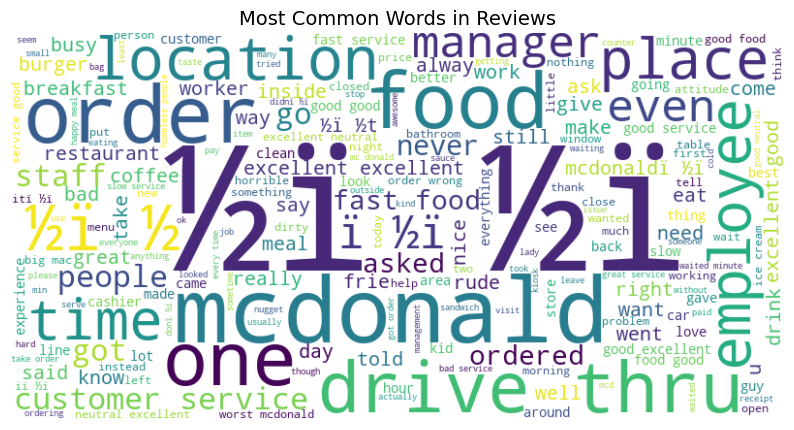

In [18]:
# Define stop words
stop_words = set(stopwords.words("english"))

# Combine all reviews into one text
all_text = " ".join(df["review"]).lower()

# Remove stop words
filtered_text = " ".join([word for word in all_text.split() if word not in stop_words])

# Generate Word Cloud
plt.figure(figsize=(10,6))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(filtered_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reviews", fontsize=14)
plt.show()


## Data Preprocessing

### Handle Duplicates

In [4]:
print(f"Dataset size before removing duplicates: {df.shape}")
df = df.drop_duplicates(subset=['review'], keep='first')
print(f"Dataset size after removing duplicates: {df.shape}")


Dataset size before removing duplicates: (33396, 10)
Dataset size after removing duplicates: (22285, 10)


### Data Type Conversion

In [5]:
# Ensure 'rating' is numeric
print('Before: ', df['rating'].dtype)
df['rating'] = df['rating'].astype(str).str.extract('(\d+)')[0].astype(int)
print('After: ', df['rating'].dtype)
df['rating']

Before:  object
After:  int64


0        1
1        4
2        1
3        5
4        1
        ..
33391    1
33392    5
33393    4
33394    5
33395    5
Name: rating, Length: 22285, dtype: int64

### Feature Engineering

In [6]:
# Function to map ratings to sentiment labels
def map_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

# Apply sentiment mapping permanently to df
df["sentiment"] = df["rating"].apply(map_sentiment)

df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,sentiment
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1,Negative
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4,Positive
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1,Negative
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,Positive
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1,Negative


### Visualization of New Feature

C:\Users\cocon\AppData\Local\Temp\ipykernel_28148\3588363368.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['sentiment'], palette=colors, order=['Negative', 'Neutral', 'Positive'])


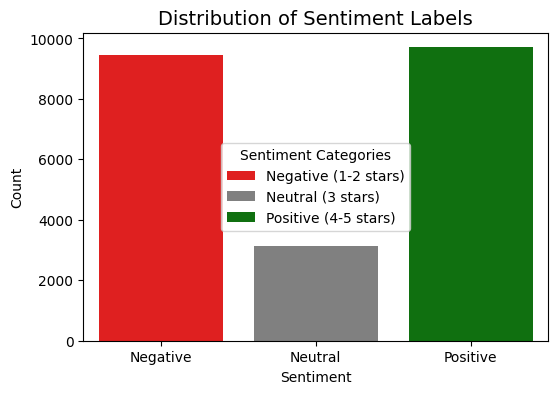

In [7]:
# Define color palette for better visualization
colors = {"Negative": "red", "Neutral": "gray", "Positive": "green"}

plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['sentiment'], palette=colors, order=['Negative', 'Neutral', 'Positive'])

# Add a legend explaining rating to sentiment mapping
legend_labels = [
    "Negative (1-2 stars)",
    "Neutral (3 stars)",
    "Positive (4-5 stars)"
]
plt.legend(handles=ax.patches, labels=legend_labels, title="Sentiment Categories", loc='center')

# Title and labels
plt.title("Distribution of Sentiment Labels", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Show the plot
plt.show()

### Remove Emojis, Special Characters, and Punctuation

In [8]:
def remove_emojis_special(text):
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # remove emojis/non-ascii chars
    text = re.sub(r'[^\w\s]', '', text)        # remove punctuation/special chars
    return text.lower()

df['cleaned_review'] = df['review'].apply(remove_emojis_special)
df[['review', 'cleaned_review']].head()



,review,cleaned_review
0,Why does it look like someone spit on my food?...,why does it look like someone spit on my food\...
1,It'd McDonalds. It is what it is as far as the...,itd mcdonalds it is what it is as far as the f...
2,Made a mobile order got to the speaker and che...,made a mobile order got to the speaker and che...
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,my mc crispy chicken sandwich was customer se...
4,"I repeat my order 3 times in the drive thru, a...",i repeat my order 3 times in the drive thru an...


### Tokenization

In [9]:
df['tokens'] = df['cleaned_review'].apply(word_tokenize)
df[['cleaned_review', 'tokens']].head()

,cleaned_review,tokens
0,why does it look like someone spit on my food\...,"[why, does, it, look, like, someone, spit, on,..."
1,itd mcdonalds it is what it is as far as the f...,"[itd, mcdonalds, it, is, what, it, is, as, far..."
2,made a mobile order got to the speaker and che...,"[made, a, mobile, order, got, to, the, speaker..."
3,my mc crispy chicken sandwich was customer se...,"[my, mc, crispy, chicken, sandwich, was, custo..."
4,i repeat my order 3 times in the drive thru an...,"[i, repeat, my, order, 3, times, in, the, driv..."


### Removing Stopwords

In [10]:
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda words: [w for w in words if w not in stop_words])

df['tokens'].head()

0    [look, like, someone, spit, food, normal, tran...
1    [itd, mcdonalds, far, food, atmosphere, go, st...
2    [made, mobile, order, got, speaker, checked, l...
3    [mc, crispy, chicken, sandwich, customer, serv...
4    [repeat, order, 3, times, drive, thru, still, ...
Name: tokens, dtype: object

In [11]:
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,sentiment,cleaned_review,tokens
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1,Negative,why does it look like someone spit on my food\...,"[look, like, someone, spit, food, normal, tran..."
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4,Positive,itd mcdonalds it is what it is as far as the f...,"[itd, mcdonalds, far, food, atmosphere, go, st..."
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1,Negative,made a mobile order got to the speaker and che...,"[made, mobile, order, got, speaker, checked, l..."
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,Positive,my mc crispy chicken sandwich was customer se...,"[mc, crispy, chicken, sandwich, customer, serv..."
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1,Negative,i repeat my order 3 times in the drive thru an...,"[repeat, order, 3, times, drive, thru, still, ..."


### Lemmatization

In [12]:
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for lemmatization
def text_lemmatization(inputs):
    return [lemmatizer.lemmatize(word=kk, pos='v') for kk in inputs]


# Perform lemmatization
df['LemmatizedText'] = df['tokens'].apply(text_lemmatization)
df['LemmatizedText'].head()

0    [look, like, someone, spit, food, normal, tran...
1    [itd, mcdonalds, far, food, atmosphere, go, st...
2    [make, mobile, order, get, speaker, check, lin...
3    [mc, crispy, chicken, sandwich, customer, serv...
4    [repeat, order, 3, time, drive, thru, still, m...
Name: LemmatizedText, dtype: object

### Concatenation of Reviews to String

In [15]:
# Concatenate tokens into a single string
df['final_text'] = df['LemmatizedText'].str.join(' ')
df['final_text'].head()

0    look like someone spit food normal transaction...
1    itd mcdonalds far food atmosphere go staff mak...
2    make mobile order get speaker check line move ...
3    mc crispy chicken sandwich customer service qu...
4    repeat order 3 time drive thru still manage me...
Name: final_text, dtype: object

### !!!!!!!!!!!!!!!Spell Checking & Correction

In [13]:
from spellchecker import SpellChecker
spell = SpellChecker()

def correct_spelling(tokens):
    return [spell.correction(word) if word not in spell else word for word in tokens]

# Example usage:
df['CorrectedText'] = df['LemmatizedText'].apply(correct_spelling)


KeyboardInterrupt: 

### !!!!!!!!!!!!!Stemming

In [17]:
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda words: [stemmer.stem(w) for w in words])

df['tokens'].head()

0    [look, like, someon, spit, food, normal, trans...
1    [itd, mcdonald, far, food, atmospher, go, staf...
2    [made, mobil, order, got, speaker, check, line...
3    [mc, crispi, chicken, sandwich, custom, servic...
4    [repeat, order, 3, time, drive, thru, still, m...
Name: tokens, dtype: object

In [14]:
# Inspect random reviews
for final_text in df['final_text'].sample(10, random_state=42):
    print("-", final_text)

KeyError: 'final_text'

### Feature Selection

In [ ]:
# Specify columns to KEEP
columns_to_keep = ['store_address', 'rating_count', 'rating', 'review', 'sentiment', 'final_text']

# Filter and keep only the columns that exist in the DataFrame
existing_columns = [col for col in columns_to_keep if col in df.columns]

# Select only these columns
df = df[existing_columns]

# Display updated dataset info
print("✅ Updated DataFrame Columns:")
print(df.info())
df.head()


✅ Updated DataFrame Columns:
<class 'pandas.core.frame.DataFrame'>
Index: 22285 entries, 0 to 33395
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   store_address  22285 non-null  object
 1   rating_count   22285 non-null  object
 2   rating         22285 non-null  int64 
 3   review         22285 non-null  object
 4   sentiment      22285 non-null  object
 5   final_text     22285 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB
None


,store_address,rating_count,rating,review,sentiment,final_text
0,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",1,Why does it look like someone spit on my food?...,Negative,look like someone spit food normal transaction...
1,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",4,It'd McDonalds. It is what it is as far as the...,Positive,itd mcdonalds far food atmosphere go staff mak...
2,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",1,Made a mobile order got to the speaker and che...,Negative,make mobile order get speaker check line move ...
3,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",5,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,Positive,mc crispy chicken sandwich customer service qu...
4,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",1,"I repeat my order 3 times in the drive thru, a...",Negative,repeat order 3 time drive thru still manage me...


### TF-IDF Vectorization

In [32]:
# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['final_text'])
y = df['sentiment']

print("Shape of X (features):", X.shape)
print("Labels (y) shape:", y.shape)
print("Unique labels in y:", y.unique())


Shape of X (features): (22285, 13594)
Labels (y) shape: (22285,)
Unique labels in y: ['Negative' 'Positive' 'Neutral']


## Post-preprocessing EDA

### Shape of the Data

In [19]:
df.shape

(22285, 6)

### Dataset Features

In [20]:
# Info of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22285 entries, 0 to 33395
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   store_address  22285 non-null  object
 1   rating_count   22285 non-null  object
 2   rating         22285 non-null  int64 
 3   review         22285 non-null  object
 4   sentiment      22285 non-null  object
 5   final_text     22285 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


### Dataset Summary

In [21]:
df.head()

,store_address,rating_count,rating,review,sentiment,final_text
0,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",1,Why does it look like someone spit on my food?...,Negative,look like someone spit food normal transaction...
1,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",4,It'd McDonalds. It is what it is as far as the...,Positive,itd mcdonalds far food atmosphere go staff mak...
2,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",1,Made a mobile order got to the speaker and che...,Negative,make mobile order get speaker check line move ...
3,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",5,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,Positive,mc crispy chicken sandwich customer service qu...
4,"13749 US-183 Hwy, Austin, TX 78750, United States","1,240",1,"I repeat my order 3 times in the drive thru, a...",Negative,repeat order 3 time drive thru still manage me...


### Word Cloud

#### General Word Cloud

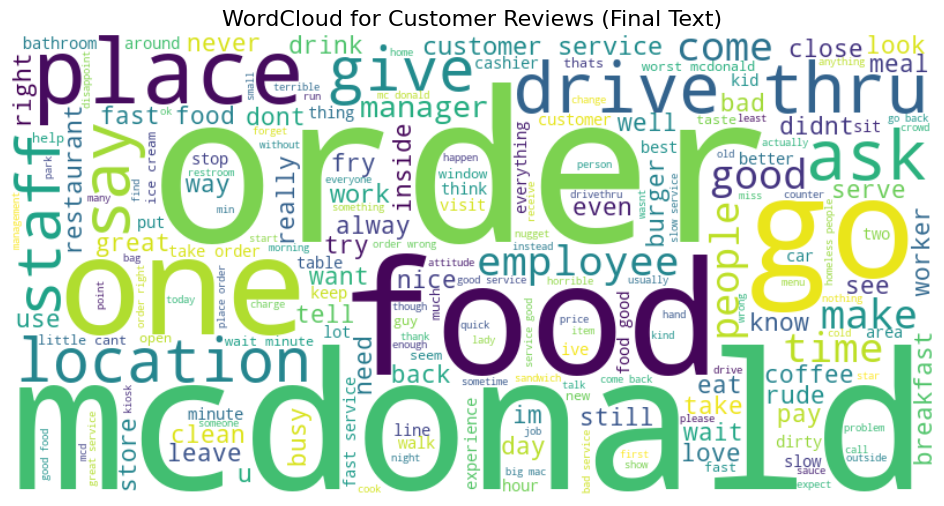

In [26]:
# Generate WordCloud directly from the 'final_text' column
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(' '.join(df['final_text']))

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Customer Reviews (Final Text)', fontsize=16)
plt.show()


#### Word Cloud for Different Sentiment

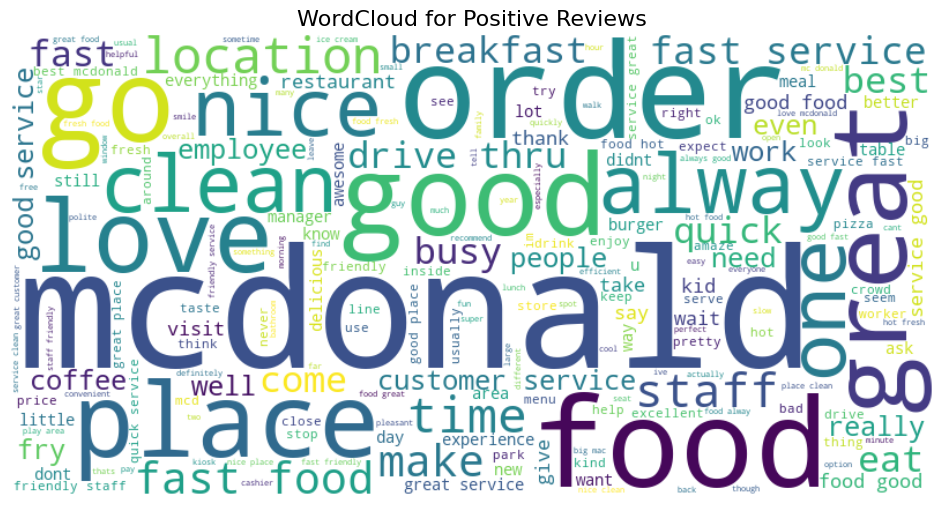

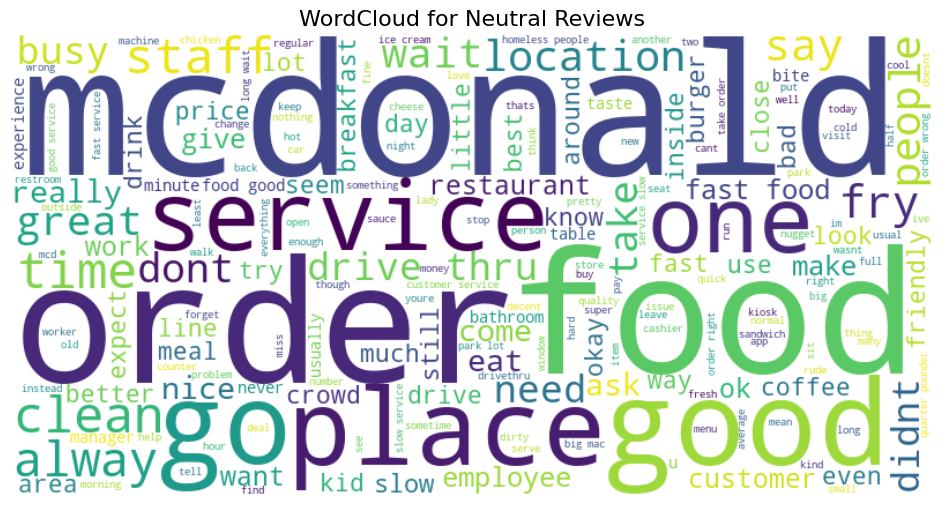

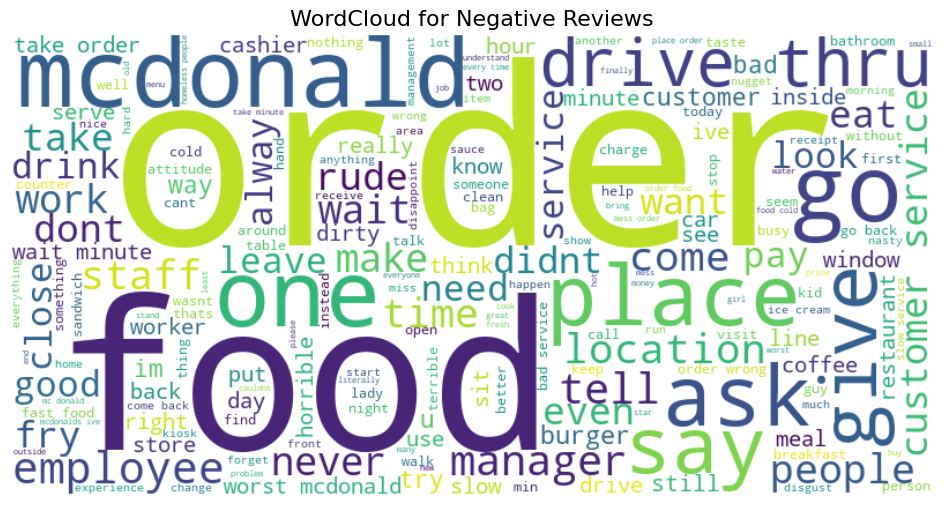

In [27]:
# Sentiment categories
sentiments = ['Positive', 'Neutral', 'Negative']

# Plot WordCloud for each sentiment
for sentiment in sentiments:
    # Join text reviews for the specific sentiment
    sentiment_text = ' '.join(df[df['sentiment'] == sentiment]['final_text'])
    
    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(sentiment_text)
    
    # Plot the WordCloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {sentiment} Reviews', fontsize=16)
    plt.show()
